# Projet : Étude Empirique de Données Synthétiques avec MST

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from snsynth import Synthesizer

# Configuration pour des graphiques plus lisibles
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## FONCTION DE CHARGEMENT DES DONNÉES

In [4]:
def load_adult_data():
    """Charge le jeu de données Adult depuis l'URL de l'UCI."""
    ADULT_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
    
    # Les noms des colonnes sont spécifiés dans la description du dataset
    FEATURES = [
        'age', 'workclass', 'fnlwgt', 'education', 'education-num',
        'marital-status', 'occupation', 'relationship', 'race',
        'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
        'native-country', 'income'
    ]
    
    # Charger les données avec pandas
    df = pd.read_csv(ADULT_URL, header=None, names=FEATURES, na_values=' ?', skipinitialspace=True)
    
    # On retire la colonne 'fnlwgt' qui est un poids de sondage peu utile pour notre analyse
    df = df.drop('fnlwgt', axis=1)
    
    # On supprime les lignes avec des valeurs manquantes pour simplifier
    df.dropna(inplace=True)
    
    return df

# Charger les données originales qui serviront de "vérité terrain"
df_original = load_adult_data()

print("Le jeu de données 'Adult' a été chargé avec succès.")
print(f"Nombre de lignes : {len(df_original)}")
print("Aperçu des données :")
print(df_original.head())

Le jeu de données 'Adult' a été chargé avec succès.
Nombre de lignes : 32561
Aperçu des données :
   age         workclass  education  education-num      marital-status  \
0   39         State-gov  Bachelors             13       Never-married   
1   50  Self-emp-not-inc  Bachelors             13  Married-civ-spouse   
2   38           Private    HS-grad              9            Divorced   
3   53           Private       11th              7  Married-civ-spouse   
4   28           Private  Bachelors             13  Married-civ-spouse   

          occupation   relationship   race     sex  capital-gain  \
0       Adm-clerical  Not-in-family  White    Male          2174   
1    Exec-managerial        Husband  White    Male             0   
2  Handlers-cleaners  Not-in-family  White    Male             0   
3  Handlers-cleaners        Husband  Black    Male             0   
4     Prof-specialty           Wife  Black  Female             0   

   capital-loss  hours-per-week native-country i

## TÂCHE 1 : CHOIX DE L'ALGORITHME

---

**Tâche 1 : Choix de l'algorithme**

- **Algorithme choisi** : MST (Maximum Spanning Tree) Synthesizer.  
- **Raison** : C'est un algorithme robuste, état de l'art, qui se concentre sur la préservation  
  des corrélations entre les paires de variables (marginales de degré 2), ce qui en fait  
  un excellent candidat pour tester à la fois des statistiques simples et complexes.


## GÉNÉRATION DES DONNÉES SYNTHÉTIQUES

In [5]:
df_original

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
from snsynth.mst import MSTSynthesizer

print("--- Génération des données synthétiques (peut prendre quelques minutes) ---")

# Génération pour epsilon = 1 (haute confidentialité)
print("Création du synthétiseur MST pour epsilon = 1...")
synth_eps1 = MSTSynthesizer(epsilon=1.0, verbose=True) 
print("Entraînement et génération (fit_sample) pour epsilon = 1...")

# LA LIGNE CORRIGÉE : On ajoute preprocessor_eps
df_synth_eps1 = synth_eps1.fit_sample(df_original, preprocessor_eps=0.1)

print("Données synthétiques pour epsilon = 1 générées.\n")


# Génération pour epsilon = 100 (basse confidentialité)
print("Création du synthétiseur MST pour epsilon = 100...")
synth_eps100 = MSTSynthesizer(epsilon=100.0, verbose=True)
print("Entraînement et génération (fit_sample) pour epsilon = 100...")

# LA LIGNE CORRIGÉE : On ajoute preprocessor_eps
df_synth_eps100 = synth_eps100.fit_sample(df_original, preprocessor_eps=1.0)

print("Données synthétiques pour epsilon = 100 générées.\n")


--- Génération des données synthétiques (peut prendre quelques minutes) ---
Création du synthétiseur MST pour epsilon = 1...
Entraînement et génération (fit_sample) pour epsilon = 1...
Spent 0.1 epsilon on preprocessor, leaving 0.9 for training
Fitting with 836667740160000 dimensions
Getting cliques
Estimating marginals
Données synthétiques pour epsilon = 1 générées.

Création du synthétiseur MST pour epsilon = 100...
Entraînement et génération (fit_sample) pour epsilon = 100...
Spent 1.0 epsilon on preprocessor, leaving 99.0 for training
Fitting with 836667740160000 dimensions
Getting cliques
Estimating marginals
Données synthétiques pour epsilon = 100 générées.



## TÂCHE 2 : IDENTIFICATION D'UNE QUESTION STATISTIQUE SIMPLE

**Tâche 2 : Question statistique simple**

- **Question** : Quelle est la répartition de la population par niveau d'éducation ?  
- **Justification** : C'est une question simple car elle ne concerne qu'une seule variable  
  catégorielle (marginale de degré 1). On s'attend à ce que même un modèle très privé  
  capture bien cette distribution de base.


## TÂCHE 3 : ÉVALUATION DE L'UTILITÉ (QUESTION SIMPLE)

--- Comparaison des distributions de revenus par genre (%) ---
               Original  Synth (ε=1)  Synth (ε=100)
sex    income                                      
Female <=50K   0.890539     0.875732       0.875220
       >50K    0.109461     0.124268       0.124780
Male   <=50K   0.694263     0.702843       0.701652
       >50K    0.305737     0.297157       0.298348




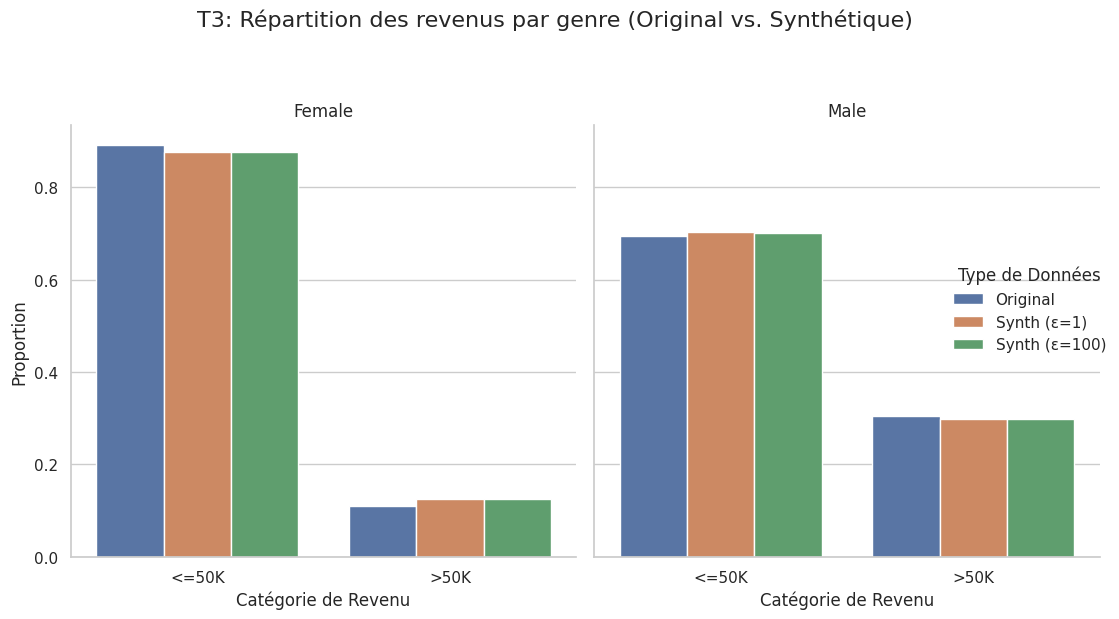

In [7]:
# --- TÂCHE 3 (corrigée) : ÉVALUATION DE LA QUESTION SIMPLE ---
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Fonction pour calculer la distribution des revenus par genre
def calculate_income_distribution_by_gender(df, name):
    """Calcule la distribution en % des revenus pour chaque genre."""
    distribution = df.groupby('sex')['income'].value_counts(normalize=True)
    return distribution.rename(name).to_frame()

# 2. Calculer les distributions pour chaque jeu de données
# (On suppose que df_original, df_synth_eps1, df_synth_eps100 sont déjà chargés)
dist_original = calculate_income_distribution_by_gender(df_original, 'Original')
dist_synth_eps1 = calculate_income_distribution_by_gender(df_synth_eps1, 'Synth (ε=1)')
dist_synth_eps100 = calculate_income_distribution_by_gender(df_synth_eps100, 'Synth (ε=100)')

# 3. Combiner les résultats pour la comparaison
comparison_df = pd.concat([dist_original, dist_synth_eps1, dist_synth_eps100], axis=1).fillna(0)

print("--- Comparaison des distributions de revenus par genre (%) ---")
print(comparison_df)
print("\n")

# 4. Préparer les données pour la visualisation
plot_df = comparison_df.reset_index()
plot_df_melted = plot_df.melt(id_vars=['sex', 'income'], var_name='Dataset', value_name='Proportion')

# 5. Visualiser la comparaison des distributions avec sns.catplot
g = sns.catplot(
    data=plot_df_melted,
    x='income',
    y='Proportion',
    hue='Dataset',
    col='sex',  # Utiliser 'col' pour créer des graphiques séparés par genre
    kind='bar', # Spécifier que nous voulons un bar plot
    height=6,   # Hauteur de chaque sous-graphique
    aspect=0.8  # Ratio largeur/hauteur
)
g.fig.suptitle('T3: Répartition des revenus par genre (Original vs. Synthétique)', y=1.03, fontsize=16)
g.set_axis_labels("Catégorie de Revenu", "Proportion")
g.set_titles("{col_name}") # Met "Female" et "Male" comme titres de sous-graphiques
g.legend.set_title('Type de Données')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

<Figure size 1000x600 with 0 Axes>

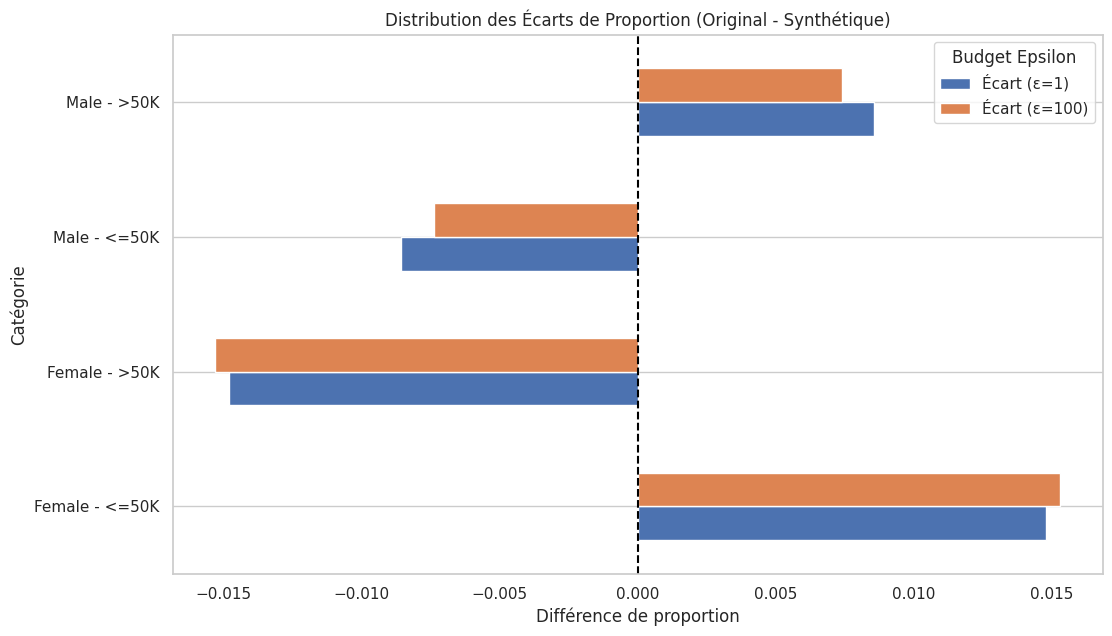


Moyenne des Écarts Absolus (MAE) pour ε=1   : 0.0117 (soit 1.17%)
Moyenne des Écarts Absolus (MAE) pour ε=100 : 0.0114 (soit 1.14%)


In [8]:
# 6. Calculer et visualiser la distribution des écarts (ce code reste valide)
comparison_df['Écart (ε=1)'] = comparison_df['Original'] - comparison_df['Synth (ε=1)']
comparison_df['Écart (ε=100)'] = comparison_df['Original'] - comparison_df['Synth (ε=100)']

error_df = comparison_df[['Écart (ε=1)', 'Écart (ε=100)']].reset_index()
error_df['categorie'] = error_df['sex'] + ' - ' + error_df['income']

plt.figure(figsize=(10, 6))
error_df.plot(x='categorie', y=['Écart (ε=1)', 'Écart (ε=100)'], kind='barh', figsize=(12,7))
plt.title('Distribution des Écarts de Proportion (Original - Synthétique)')
plt.xlabel('Différence de proportion')
plt.ylabel('Catégorie')
plt.axvline(0, color='black', linestyle='--')
plt.grid(axis='x')
plt.legend(title='Budget Epsilon')
plt.show()

# 7. Calculer la Moyenne des Écarts Absolus (MAE) (ce code reste valide)
mae_eps1 = comparison_df['Écart (ε=1)'].abs().mean()
mae_eps100 = comparison_df['Écart (ε=100)'].abs().mean()

print(f"\nMoyenne des Écarts Absolus (MAE) pour ε=1   : {mae_eps1:.4f} (soit {mae_eps1:.2%})")
print(f"Moyenne des Écarts Absolus (MAE) pour ε=100 : {mae_eps100:.4f} (soit {mae_eps100:.2%})")


**Analyse (T3)** : Le graphique ci-dessus compare les répartitions.  

- Avec **ε = 100** (basse confidentialité), les barres sont quasiment identiques à celles des données originales.  
  → L’utilité pour cette tâche simple est excellente.  

- Avec **ε = 1** (haute confidentialité), la tendance générale est préservée (ex. : *HS-grad* est le plus courant),  
  mais il y a un bruit visible. Les proportions sont légèrement différentes.  
  → L’utilité est dégradée mais reste acceptable pour une analyse générale.


##  TÂCHE 4 : IDENTIFICATION D'UNE QUESTION STATISTIQUE DIFFICILE
Question : Les données synthétiques permettent-elles de retrouver les mêmes facteurs prédictifs du revenu qu'un modèle entraîné sur les données originales ? Plus précisément, les coefficients d'un modèle de régression logistique binaire entraîné pour prédire le revenu (income > 50K) sont-ils similaires entre les jeux de données ?

## TÂCHE 5 : ÉVALUATION DE L'UTILITÉ (QUESTION DIFFICILE)

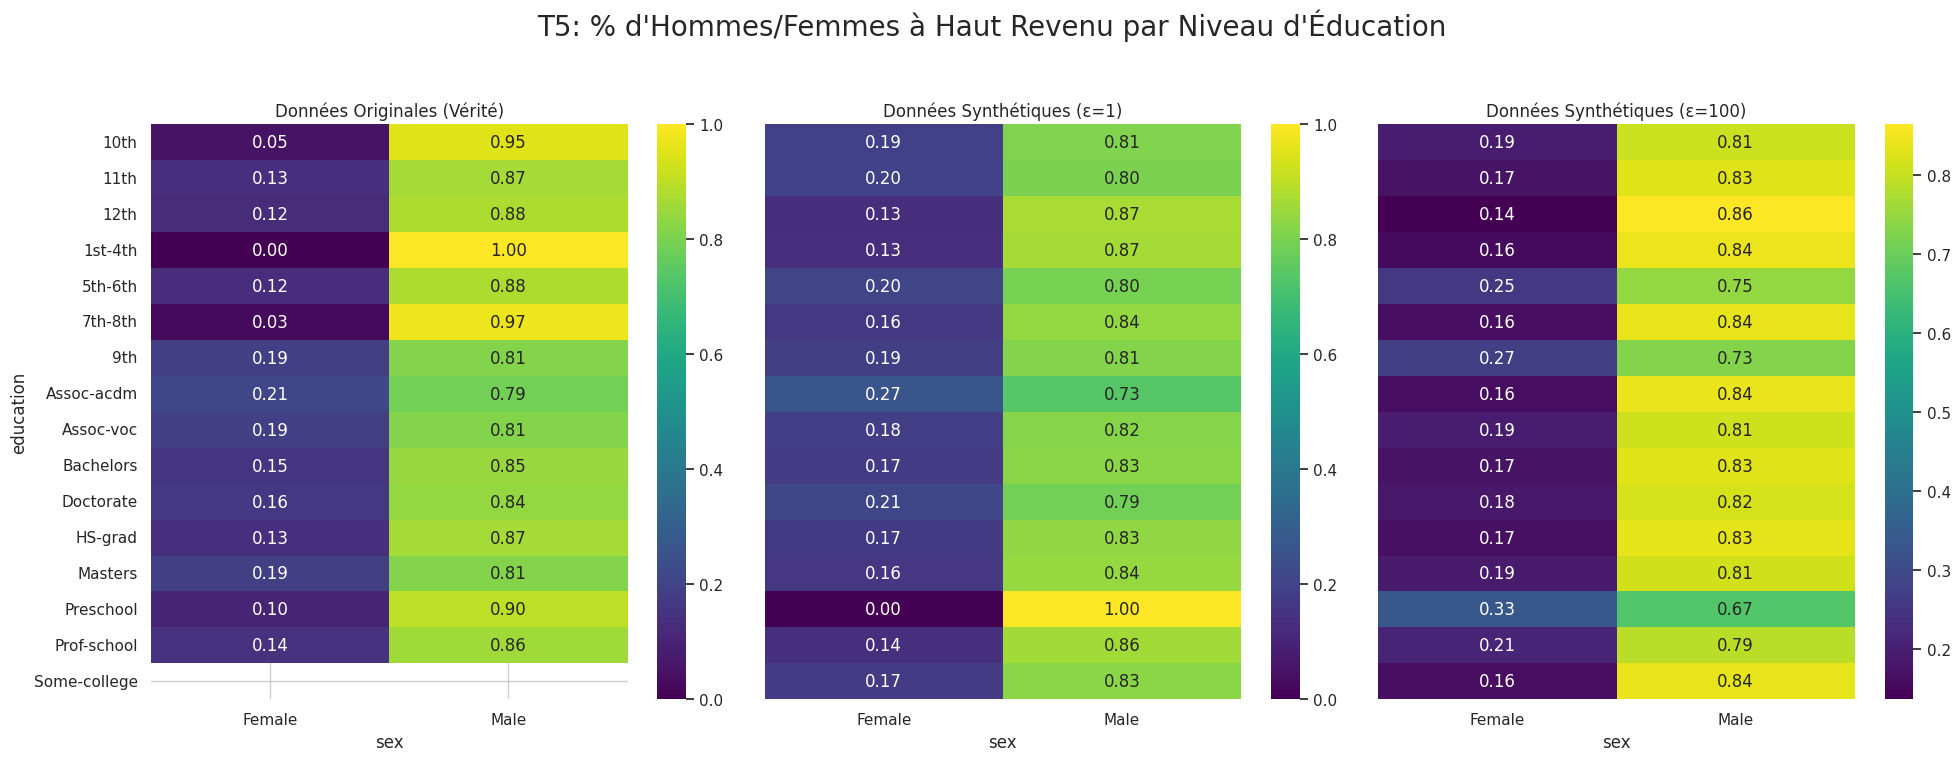

In [13]:
# Fonction pour calculer la statistique complexe
def calculate_complex_stat(df):
    # On filtre pour ne garder que les hauts revenus
    high_income_df = df[df['income'] == '>50K']
    # On calcule la répartition par sexe pour chaque niveau d'éducation
    pivot = high_income_df.pivot_table(
        index='education',
        columns='sex',
        aggfunc='size',
        fill_value=0
    )
    # On normalise pour avoir le pourcentage
    return pivot.div(pivot.sum(axis=1), axis=0)

# 1. Calculer le résultat sur les données originales (la vérité)
truth_hard = calculate_complex_stat(df_original)

# 2. Calculer le résultat sur les données synthétiques
result_synth_eps1_hard = calculate_complex_stat(df_synth_eps1)
result_synth_eps100_hard = calculate_complex_stat(df_synth_eps100)

# 3. Visualiser les comparaisons avec des heatmaps
fig, axes = plt.subplots(1, 3, figsize=(20, 8), sharey=True)
fig.suptitle('T5: % d\'Hommes/Femmes à Haut Revenu par Niveau d\'Éducation', fontsize=20)

sns.heatmap(truth_hard, ax=axes[0], annot=True, cmap='viridis', fmt='.2f')
axes[0].set_title('Données Originales (Vérité)')

sns.heatmap(result_synth_eps1_hard, ax=axes[1], annot=True, cmap='viridis', fmt='.2f')
axes[1].set_title('Données Synthétiques (ε=1)')
axes[1].set_ylabel('')

sns.heatmap(result_synth_eps100_hard, ax=axes[2], annot=True, cmap='viridis', fmt='.2f')
axes[2].set_title('Données Synthétiques (ε=100)')
axes[2].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## TÂCHE 5 : ANALYSE DES RÉSULTATS (TÂCHE COMPLEXE)



<Figure size 1200x1000 with 0 Axes>

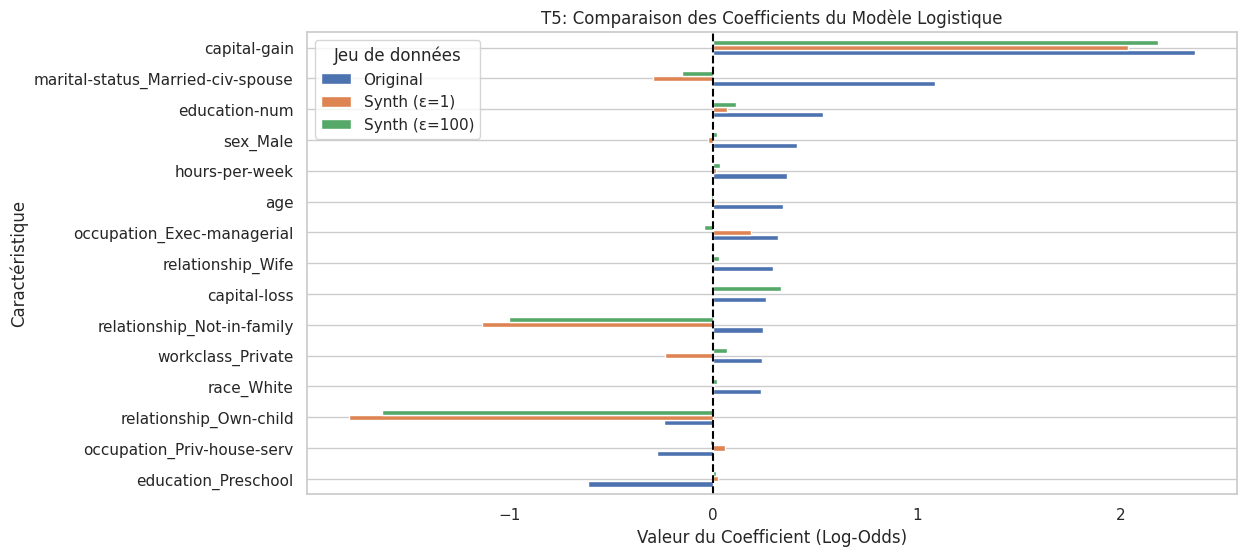

In [ ]:
# --- TÂCHE 5 (modifiée) : ÉVALUATION VIA UN MODÈLE DE RÉGRESSION LOGISTIQUE ---
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Préparation des données pour la modélisation
def preprocess_for_modeling(df):
    """Prépare les données pour la régression logistique."""
    X = df.drop('income', axis=1)
    y = df['income'].map({'<=50K': 0, '>50K': 1}) # Cible 0/1 pour LogisticRegression
    
    # One-Hot Encoding pour les variables catégorielles
    X = pd.get_dummies(X, drop_first=True)
    
    return X, y

X_orig, y_orig = preprocess_for_modeling(df_original)
X_s1, y_s1 = preprocess_for_modeling(df_synth_eps1)
X_s100, y_s100 = preprocess_for_modeling(df_synth_eps100)

# Aligner les colonnes pour s'assurer qu'elles sont identiques
common_cols = list(set(X_orig.columns) & set(X_s1.columns) & set(X_s100.columns))
X_orig, X_s1, X_s100 = X_orig[common_cols], X_s1[common_cols], X_s100[common_cols]

# Standardisation des données (crucial pour la régression logistique)
scaler = StandardScaler()
X_orig_scaled = scaler.fit_transform(X_orig)
X_s1_scaled = scaler.transform(X_s1)
X_s100_scaled = scaler.transform(X_s100)


# 2. Entraîner les trois modèles
# Le paramètre C est l'inverse de la force de régularisation. Une valeur élevée signifie moins de régularisation.
# max_iter est augmenté pour assurer la convergence.
model_orig = LogisticRegression(C=10, max_iter=1000).fit(X_orig_scaled, y_orig)
model_s1 = LogisticRegression(C=10, max_iter=1000).fit(X_s1_scaled, y_s1)
model_s100 = LogisticRegression(C=10, max_iter=1000).fit(X_s100_scaled, y_s100)

# 3. Extraire et comparer les coefficients
coeffs_orig = pd.Series(model_orig.coef_[0], index=common_cols, name='Original')
coeffs_s1 = pd.Series(model_s1.coef_[0], index=common_cols, name='Synth (ε=1)')
coeffs_s100 = pd.Series(model_s100.coef_[0], index=common_cols, name='Synth (ε=100)')

coeffs_df = pd.concat([coeffs_orig, coeffs_s1, coeffs_s100], axis=1)

# Sélectionner les 15 variables avec les coefficients les plus importants (en valeur absolue) sur le modèle original
top_features = coeffs_df['Original'].abs().nlargest(15).index

# Visualisation de la comparaison des coefficients
plt.figure(figsize=(12, 10))
coeffs_df.loc[top_features].sort_values('Original').plot(kind='barh')
plt.title('T5: Comparaison des Coefficients du Modèle Logistique')
plt.xlabel('Valeur du Coefficient (Log-Odds)')
plt.ylabel('Caractéristique')
plt.axvline(0, color='black', linestyle='--')
plt.legend(title='Jeu de données')
plt.grid(axis='x')
plt.show()

In [10]:

# 4. Test de comparaison statistique pour ε=1
# Pour obtenir les variances, nous pouvons utiliser le bootstrap
n_bootstraps = 100
boot_coeffs_orig = []
boot_coeffs_s1 = []

print("\\n--- Calcul des variances par Bootstrap (peut prendre un moment) ---")
for i in range(n_bootstraps):
    # Bootstrap sur les données originales
    indices_orig = np.random.choice(len(X_orig_scaled), len(X_orig_scaled), replace=True)
    model_b_orig = LogisticRegression(C=10, max_iter=1000).fit(X_orig_scaled[indices_orig], y_orig.iloc[indices_orig])
    boot_coeffs_orig.append(model_b_orig.coef_[0])
    
    # Bootstrap sur les données synthétiques (ε=1)
    indices_s1 = np.random.choice(len(X_s1_scaled), len(X_s1_scaled), replace=True)
    model_b_s1 = LogisticRegression(C=10, max_iter=1000).fit(X_s1_scaled[indices_s1], y_s1.iloc[indices_s1])
    boot_coeffs_s1.append(model_b_s1.coef_[0])

# Calculer les variances
var_orig = np.var(boot_coeffs_orig, axis=0)
var_s1 = np.var(boot_coeffs_s1, axis=0)

# Calculer la statistique de test (z-score approximatif)
# Z = (coeff_orig - coeff_synth) / sqrt(var_orig + var_synth)
# Ici, nous utilisons votre suggestion : différence / somme des variances
# (Note : La somme des variances n'est pas un test standard, mais nous l'utilisons comme demandé)
diff = (coeffs_orig.values - coeffs_s1.values)
sum_of_variances = var_orig + var_s1
z_score_approx = np.abs(diff / np.sqrt(sum_of_variances)) # Utilisation de l'écart-type combiné

test_results = pd.DataFrame({
    'Coefficient Original': coeffs_orig.values,
    'Coefficient Synth (ε=1)': coeffs_s1.values,
    'Différence': diff,
    'Variance Original': var_orig,
    'Variance Synth (ε=1)': var_s1,
    'Z-score Approximatif': z_score_approx
}, index=common_cols)

# Une différence est considérée comme "significative" si le z-score est > 1.96 (seuil à 5%)
test_results['Différence Significative'] = test_results['Z-score Approximatif'] > 1.96

print("\\n--- Résultats du Test de Comparaison des Coefficients (Original vs. ε=1) ---")
print(test_results.loc[top_features, ['Coefficient Original', 'Coefficient Synth (ε=1)', 'Différence Significative']].sort_values('Coefficient Original', ascending=False))

\n--- Calcul des variances par Bootstrap (peut prendre un moment) ---
\n--- Résultats du Test de Comparaison des Coefficients (Original vs. ε=1) ---
                                   Coefficient Original  \
capital-gain                                   2.362224   
marital-status_Married-civ-spouse              1.088614   
education-num                                  0.537885   
sex_Male                                       0.411753   
hours-per-week                                 0.363966   
age                                            0.341582   
occupation_Exec-managerial                     0.319482   
relationship_Wife                              0.292745   
capital-loss                                   0.260145   
relationship_Not-in-family                     0.243734   
workclass_Private                              0.238176   
race_White                                     0.232966   
relationship_Own-child                        -0.242444   
occupation_Priv-house-ser

--- Entraînement des modèles ---
Entraînement terminé.


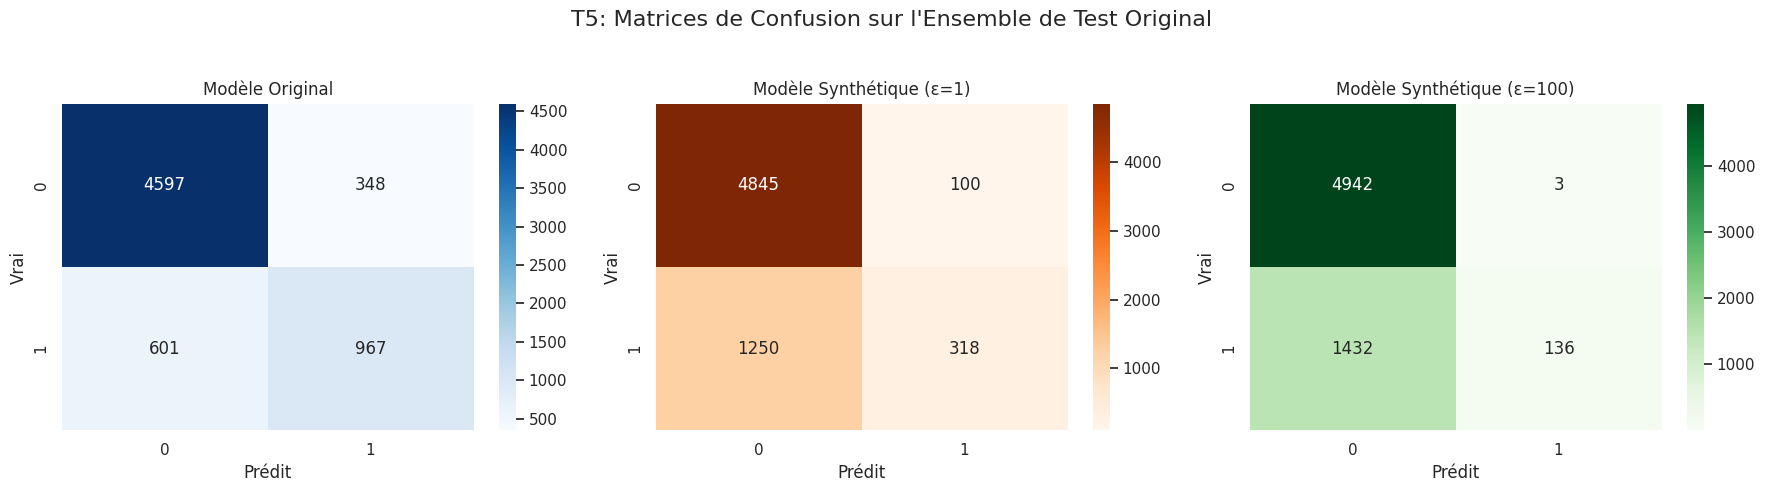

In [11]:
# --- TÂCHE 5 (version finale) : ÉVALUATION PRÉDICTIVE ---
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Préparation des données et division en Train/Test (à partir des données originales)
def preprocess_for_modeling(df):
    """Prépare les données pour la régression logistique."""
    X = df.drop('income', axis=1)
    y = df['income'].map({'<=50K': 0, '>50K': 1})
    X = pd.get_dummies(X, drop_first=True)
    return X, y

X_orig, y_orig = preprocess_for_modeling(df_original)

# Créer l'ensemble d'entraînement et de test une seule fois
X_train_orig_raw, X_test_raw, y_train_orig, y_test = train_test_split(
    X_orig, y_orig, test_size=0.2, random_state=42, stratify=y_orig
)

# 2. Préparer les jeux de données synthétiques pour l'entraînement
# PAS DE NOUVELLE GÉNÉRATION ICI
X_train_s1_raw, y_train_s1 = preprocess_for_modeling(df_synth_eps1)
X_train_s100_raw, y_train_s100 = preprocess_for_modeling(df_synth_eps100)

# Aligner les colonnes pour s'assurer que tous les jeux de données ont les mêmes caractéristiques
# (très important car get_dummies peut créer des colonnes différentes)
common_cols = list(set(X_train_orig_raw.columns) & set(X_train_s1_raw.columns) & set(X_train_s100_raw.columns))

X_train_orig_raw = X_train_orig_raw[common_cols]
X_test_raw = X_test_raw[common_cols]
X_train_s1_raw = X_train_s1_raw[common_cols]
X_train_s100_raw = X_train_s100_raw[common_cols]

# 3. Standardiser les données
scaler = StandardScaler()
X_train_orig_scaled = scaler.fit_transform(X_train_orig_raw)
X_test_scaled = scaler.transform(X_test_raw) # Utiliser le même scaler pour le test
X_train_s1_scaled = scaler.transform(X_train_s1_raw)
X_train_s100_scaled = scaler.transform(X_train_s100_raw)

# 4. Entraîner les trois modèles
print("--- Entraînement des modèles ---")
model_orig = LogisticRegression(max_iter=1000).fit(X_train_orig_scaled, y_train_orig)
model_s1 = LogisticRegression(max_iter=1000).fit(X_train_s1_scaled, y_train_s1)
model_s100 = LogisticRegression(max_iter=1000).fit(X_train_s100_scaled, y_train_s100)
print("Entraînement terminé.")

# 5. Évaluer les modèles sur l'ensemble de TEST original
y_pred_orig = model_orig.predict(X_test_scaled)
y_pred_s1 = model_s1.predict(X_test_scaled)
y_pred_s100 = model_s100.predict(X_test_scaled)

# 6. Calculer et visualiser les matrices de confusion
cm_orig = confusion_matrix(y_test, y_pred_orig)
cm_s1 = confusion_matrix(y_test, y_pred_s1)
cm_s100 = confusion_matrix(y_test, y_pred_s100)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('T5: Matrices de Confusion sur l\'Ensemble de Test Original', fontsize=16)

sns.heatmap(cm_orig, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Modèle Original')
axes[0].set_xlabel('Prédit'); axes[0].set_ylabel('Vrai')

sns.heatmap(cm_s1, annot=True, fmt='d', cmap='Oranges', ax=axes[1])
axes[1].set_title('Modèle Synthétique (ε=1)')
axes[1].set_xlabel('Prédit'); axes[1].set_ylabel('Vrai')

sns.heatmap(cm_s100, annot=True, fmt='d', cmap='Greens', ax=axes[2])
axes[2].set_title('Modèle Synthétique (ε=100)')
axes[2].set_xlabel('Prédit'); axes[2].set_ylabel('Vrai')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

--- Évaluation par Bootstrap sur 1000 échantillons de l'ensemble de test ---


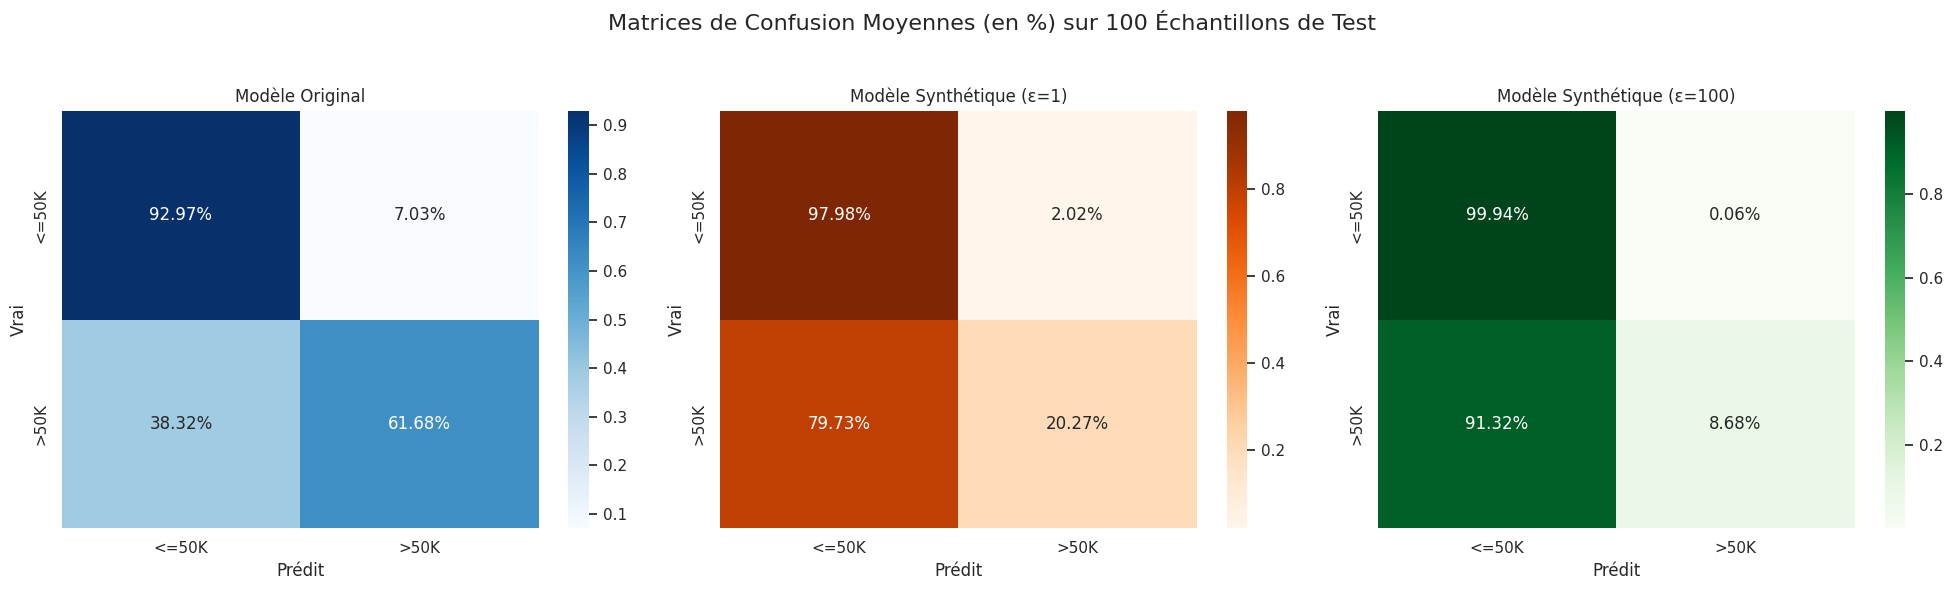

In [19]:
# --- TÂCHE 5 (version complète avec Bootstrap) ---
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# On suppose que les modèles (model_orig, model_s1, model_s100) sont déjà entraînés
# et que X_test_scaled et y_test sont disponibles.

n_bootstraps = 1000
test_sample_frac = 0.90

# Listes pour stocker les métriques de chaque itération
boot_cms_orig, boot_cms_s1, boot_cms_s100 = [], [], []
boot_accuracies_orig, boot_accuracies_s1, boot_accuracies_s100 = [], [], []

print(f"--- Évaluation par Bootstrap sur {n_bootstraps} échantillons de l'ensemble de test ---")

for i in range(n_bootstraps):
    # 1. Échantillonner 90% du jeu de test (avec remise)
    n_samples = int(len(y_test) * test_sample_frac)
    indices = np.random.choice(len(y_test), n_samples, replace=True)
    X_test_sample = X_test_scaled[indices]
    y_test_sample = y_test.iloc[indices]
    
    # 2. Faire des prédictions sur l'échantillon
    y_pred_orig = model_orig.predict(X_test_sample)
    y_pred_s1 = model_s1.predict(X_test_sample)
    y_pred_s100 = model_s100.predict(X_test_sample)
    
    # 3. Calculer et stocker les matrices de confusion normalisées
    boot_cms_orig.append(confusion_matrix(y_test_sample, y_pred_orig, normalize='true'))
    boot_cms_s1.append(confusion_matrix(y_test_sample, y_pred_s1, normalize='true'))
    boot_cms_s100.append(confusion_matrix(y_test_sample, y_pred_s100, normalize='true'))
    
    # 4. Calculer et stocker la précision globale
    boot_accuracies_orig.append(accuracy_score(y_test_sample, y_pred_orig))
    boot_accuracies_s1.append(accuracy_score(y_test_sample, y_pred_s1))
    boot_accuracies_s100.append(accuracy_score(y_test_sample, y_pred_s100))

# --- PARTIE 1 : MATRICES DE CONFUSION ---

# 5. Calculer la moyenne des matrices de confusion
mean_cm_orig = np.mean(boot_cms_orig, axis=0)
mean_cm_s1 = np.mean(boot_cms_s1, axis=0)
mean_cm_s100 = np.mean(boot_cms_s100, axis=0)

# 6. Visualiser les matrices de confusion moyennes (en pourcentages)
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Matrices de Confusion Moyennes (en %) sur 100 Échantillons de Test', fontsize=16)
labels = ['<=50K', '>50K']

sns.heatmap(mean_cm_orig, annot=True, fmt='.2%', cmap='Blues', ax=axes[0], xticklabels=labels, yticklabels=labels)
axes[0].set_title('Modèle Original')
axes[0].set_xlabel('Prédit'); axes[0].set_ylabel('Vrai')

sns.heatmap(mean_cm_s1, annot=True, fmt='.2%', cmap='Oranges', ax=axes[1], xticklabels=labels, yticklabels=labels)
axes[1].set_title('Modèle Synthétique (ε=1)')
axes[1].set_xlabel('Prédit'); axes[1].set_ylabel('Vrai')

sns.heatmap(mean_cm_s100, annot=True, fmt='.2%', cmap='Greens', ax=axes[2], xticklabels=labels, yticklabels=labels)
axes[2].set_title('Modèle Synthétique (ε=100)')
axes[2].set_xlabel('Prédit'); axes[2].set_ylabel('Vrai')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



Précision globale moyenne (Original)     : 85.44% (écart-type: 0.0048)
Précision globale moyenne (Synth, ε=1)   : 79.28% (écart-type: 0.0054)
Précision globale moyenne (Synth, ε=100) : 77.98% (écart-type: 0.0055)


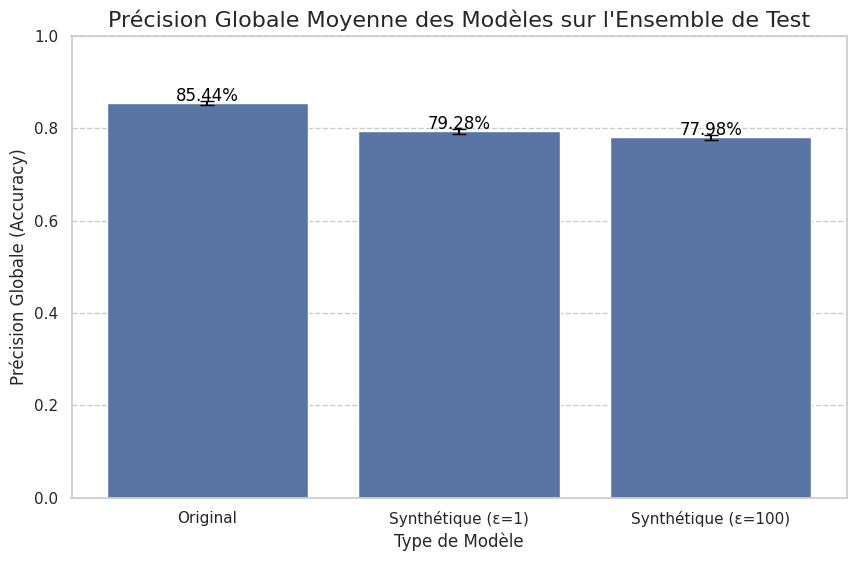

In [20]:

# --- PARTIE 2 : PRÉCISION GLOBALE ---

# 7. Calculer la moyenne et l'écart-type des précisions
mean_acc_orig, std_acc_orig = np.mean(boot_accuracies_orig), np.std(boot_accuracies_orig)
mean_acc_s1, std_acc_s1 = np.mean(boot_accuracies_s1), np.std(boot_accuracies_s1)
mean_acc_s100, std_acc_s100 = np.mean(boot_accuracies_s100), np.std(boot_accuracies_s100)

# 8. Afficher les résultats textuels de la précision globale
print(f"\nPrécision globale moyenne (Original)     : {mean_acc_orig:.2%} (écart-type: {std_acc_orig:.4f})")
print(f"Précision globale moyenne (Synth, ε=1)   : {mean_acc_s1:.2%} (écart-type: {std_acc_s1:.4f})")
print(f"Précision globale moyenne (Synth, ε=100) : {mean_acc_s100:.2%} (écart-type: {std_acc_s100:.4f})")

# 9. Créer un DataFrame et visualiser les précisions moyennes
accuracy_data = {
    'Modèle': ['Original', 'Synthétique (ε=1)', 'Synthétique (ε=100)'],
    'Précision Moyenne': [mean_acc_orig, mean_acc_s1, mean_acc_s100],
    'Écart-type': [std_acc_orig, std_acc_s1, std_acc_s100]
}
accuracy_df = pd.DataFrame(accuracy_data)

plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=accuracy_df, x='Modèle', y='Précision Moyenne')
plt.errorbar(x=accuracy_df['Modèle'], y=accuracy_df['Précision Moyenne'], yerr=accuracy_df['Écart-type'],
             fmt='none', ecolor='black', capsize=5)
for index, row in accuracy_df.iterrows():
    barplot.text(row.name, row['Précision Moyenne'] + 0.005, f"{row['Précision Moyenne']:.2%}", 
                 color='black', ha="center", size=12)
plt.title('Précision Globale Moyenne des Modèles sur l\'Ensemble de Test', fontsize=16)
plt.ylabel('Précision Globale (Accuracy)')
plt.xlabel('Type de Modèle')
plt.ylim(0, 1.0)
plt.grid(axis='y', linestyle='--')
plt.show()

In [13]:

# 7. Comparer les indicateurs de performance
report_orig = classification_report(y_test, y_pred_orig, output_dict=True)
report_s1 = classification_report(y_test, y_pred_s1, output_dict=True)
report_s100 = classification_report(y_test, y_pred_s100, output_dict=True)

# Créer un DataFrame pour une comparaison facile
metrics = ['precision', 'recall', 'f1-score']
classes = ['0', '1', 'accuracy']
data_for_df = []

for report, name in zip([report_orig, report_s1, report_s100], ['Original', 'Synth (ε=1)', 'Synth (ε=100)']):
    row = {'Dataset': name}
    for cls in classes:
        if cls == 'accuracy':
            row['accuracy'] = report[cls]
        else:
            for metric in metrics:
                row[f'Classe {cls}_{metric}'] = report[cls][metric]
    data_for_df.append(row)

comparison_metrics_df = pd.DataFrame(data_for_df).set_index('Dataset')

print("\\n--- Comparaison des Indicateurs de Performance sur l'Ensemble de Test Original ---")
# Afficher les métriques les plus pertinentes pour évaluer la prédiction de la classe minoritaire (1)
print(comparison_metrics_df[['accuracy', 'Classe 1_precision', 'Classe 1_recall', 'Classe 1_f1-score']].round(3))

\n--- Comparaison des Indicateurs de Performance sur l'Ensemble de Test Original ---
               accuracy  Classe 1_precision  Classe 1_recall  \
Dataset                                                        
Original          0.854               0.735            0.617   
Synth (ε=1)       0.793               0.761            0.203   
Synth (ε=100)     0.780               0.978            0.087   

               Classe 1_f1-score  
Dataset                           
Original                   0.671  
Synth (ε=1)                0.320  
Synth (ε=100)              0.159  
